In [0]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=5, n_features=30)
y = OneHotEncoder().fit_transform(np.reshape(y, (1000, 1))).toarray()

In [0]:
n_train = 900
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


In [0]:
num_classes = train_y.shape[1]
num_features = train_X.shape[1]
num_output = train_y.shape[1]
num_layers_0 = 5
num_layers_1 = 5
learning_rate = 0.001

# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')


In [0]:
## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.get_variable('W0', shape=(num_features,num_layers_0), initializer=tf.initializers.he_uniform())
#weights_0 = tf.Variable(tf.random_normal([], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.get_variable('B0', shape = (num_layers_0), initializer = tf.initializers.he_uniform()) 
weights_1 = tf.get_variable('W1', shape = (num_layers_0,num_layers_1), initializer = tf.initializers.he_uniform())
bias_1 = tf.get_variable('B1', shape = (num_layers_1), initializer = tf.initializers.he_uniform())
weights_2 = tf.get_variable('W2', shape = (num_layers_1,num_output), initializer = tf.initializers.he_uniform())
bias_2 = tf.get_variable('B2', shape = (num_output), initializer = tf.initializers.he_uniform())

In [5]:
# Initializing weigths and biases
hidden_output_0 = tf.matmul(input_X,weights_0)+bias_0

hidden_output_0 = tf.contrib.layers.layer_norm(hidden_output_0)

hidden_output_0 = tf.nn.relu(hidden_output_0)

hidden_output_1 = tf.matmul(hidden_output_0,weights_1)+bias_1

hidden_output_1 = tf.contrib.layers.layer_norm(hidden_output_1)

hidden_output_1 = tf.nn.relu(hidden_output_1)

predicted_y = tf.sigmoid(tf.matmul(hidden_output_1,weights_2) + bias_2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y))

## Adam optimzer for finding the right weight
optimizer = tf.train.MomentumOptimizer(0.001, momentum = 0.9).minimize(cost)

## Metrics definition
correct_prediction = tf.equal(tf.argmax(predicted_y, 1), tf.argmax(input_y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


W0828 05:59:22.265884 139778491058048 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [6]:
## Training parameters
batch_size = 64
training_iters=100
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []

init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  summary_writer = tf.summary.FileWriter('./Output', sess.graph)

  for i in range(training_iters):
      for batch in range(len(train_X)//batch_size):
          batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
          batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
          opt = sess.run(optimizer, feed_dict={input_X: batch_x,
                                                              input_y: batch_y})
          loss, acc = sess.run([cost, accuracy], feed_dict={input_X: batch_x,
                                                              input_y: batch_y})

          print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
      print("Optimization Finished!")

        # Calculate accuracy for all test images
      test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={input_X: test_X,input_y : test_y})
      training_loss.append(loss)
      testing_loss.append(valid_loss)
      training_accuracy.append(acc)
      testing_accuracy.append(test_acc)
      print("Testing Accuracy:","{:.5f}".format(test_acc))
  summary_writer.close()


Iter 0, Loss= 1.699161, Training Accuracy= 0.00000
Iter 0, Loss= 1.679464, Training Accuracy= 0.00000
Iter 0, Loss= 1.679600, Training Accuracy= 0.00000
Iter 0, Loss= 1.664285, Training Accuracy= 0.00000
Iter 0, Loss= 1.699157, Training Accuracy= 0.00000
Iter 0, Loss= 1.682156, Training Accuracy= 0.00000
Iter 0, Loss= 1.698353, Training Accuracy= 0.00000
Iter 0, Loss= 1.690999, Training Accuracy= 0.00000
Iter 0, Loss= 1.695643, Training Accuracy= 0.00000
Iter 0, Loss= 1.673902, Training Accuracy= 0.00000
Iter 0, Loss= 1.693681, Training Accuracy= 0.00000
Iter 0, Loss= 1.658249, Training Accuracy= 0.00000
Iter 0, Loss= 1.686961, Training Accuracy= 0.00000
Iter 0, Loss= 1.666232, Training Accuracy= 0.00000
Optimization Finished!
Testing Accuracy: 0.00000
Iter 1, Loss= 1.694485, Training Accuracy= 0.00000
Iter 1, Loss= 1.674127, Training Accuracy= 0.00000
Iter 1, Loss= 1.674049, Training Accuracy= 0.00000
Iter 1, Loss= 1.658849, Training Accuracy= 0.00000
Iter 1, Loss= 1.693568, Training 

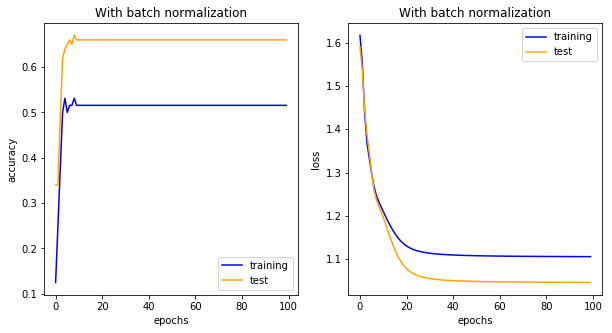

In [7]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.title('With batch normalization')

plt.plot(range(100), training_accuracy, color  = 'blue', label = 'training')
plt.plot(range(100), testing_accuracy,  color = 'orange',label =  'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.title('With batch normalization')

plt.plot(range(100), training_loss, color  = 'blue', label = 'training')
plt.plot(range(100), testing_loss,  color = 'orange', label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

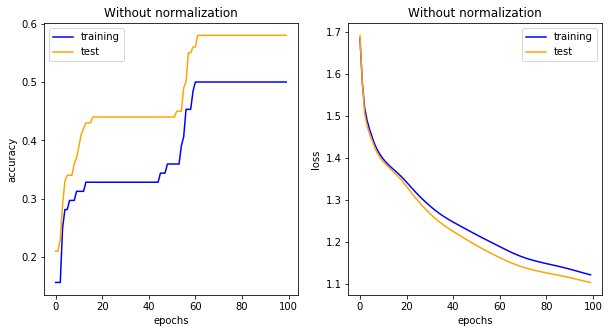

In [7]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.title('Without normalization')

plt.plot(range(100), training_accuracy, color  = 'blue', label = 'training')
plt.plot(range(100), testing_accuracy,  color = 'orange',label =  'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.title('Without normalization')

plt.plot(range(100), training_loss, color  = 'blue', label = 'training')
plt.plot(range(100), testing_loss,  color = 'orange', label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

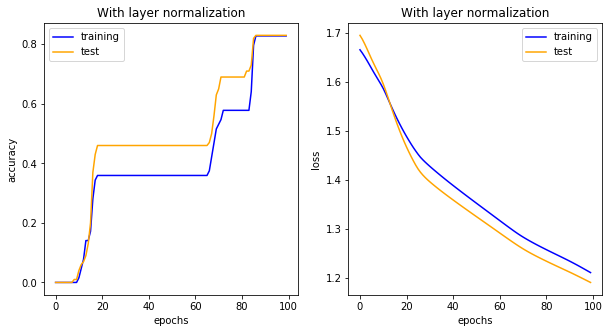

In [7]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.title('With layer normalization')

plt.plot(range(100), training_accuracy, color  = 'blue', label = 'training')
plt.plot(range(100), testing_accuracy,  color = 'orange',label =  'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.title('With layer normalization')

plt.plot(range(100), training_loss, color  = 'blue', label = 'training')
plt.plot(range(100), testing_loss,  color = 'orange', label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [0]:
# COMMENTS
# Doubt: Do we fix normalisation for preactivation or not?
# First of all, the results are very stochastic.
# Nonetheless, batch norm seems to be marginally better than performance without batch norm; training is accelarated
# layer nor doesnt seem to be accelarating performance; though sometimes superior accuracy is achieved using layer norm